In [114]:
campaign = "xho"

In [115]:
import pandas as pd
from countplayers import get_folder_data
import copy

session_data = get_folder_data(f"../_{campaign}/sessions")

In [116]:
base_df = pd.DataFrame(session_data, columns=["number", "title", "date", "players"])
base_df.set_index("number", inplace=True)
base_df.tail()

,title,date,players
number,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
27,In fondo al fiume,2023-04-01,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
28,Discussioni e ritrovamenti,2023-04-07,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
29,Volo sull'oceano,2023-04-15,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."
30,La Fiera del Domani,2023-04-29,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."


In [117]:
simplified_data = copy.deepcopy(session_data)

for data in simplified_data:
    for player in data["players"]:
        data[player["player"]] = player["name"]
    del data["players"]

df = pd.DataFrame(simplified_data).set_index("number")
df.tail()

,title,date,Fede,Camilla,Jack,Gimmy,Matte,Salo,Chiara,Red,Delu
number,,,,,,,,,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,Xandra,Estia,NaN,Kaizner,NaN,Rath,NaN,Krieg,Raknar
27,In fondo al fiume,2023-04-01,Xandra,Estia,Kir,NaN,NaN,Rath,NaN,NaN,NaN
28,Discussioni e ritrovamenti,2023-04-07,Xandra,NaN,NaN,Kaizner,NaN,Rath,Kor,Krieg,Raknar
29,Volo sull'oceano,2023-04-15,Nikolaya,NaN,NaN,NaN,NaN,Rath,Kor,Krieg,Raknar
30,La Fiera del Domani,2023-04-29,Nikolaya,Estia,Kir,NaN,NaN,Rath,NaN,NaN,Raknar


In [122]:
from matplotlib import pyplot as plt
import numpy as np

<Axes: ylabel='number'>

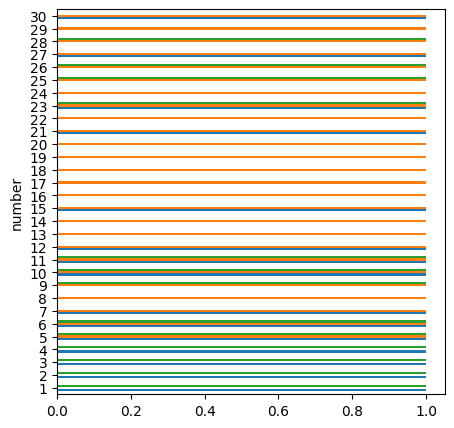

In [119]:
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False, # labels along the bottom edge are off
# )

# plt.plot(figsize=(20,20))

df[["Jack", "Salo", "Gimmy"]].notnull().plot.barh(
    legend=False,
    include_bool=True,
    figsize=(5,5),
)

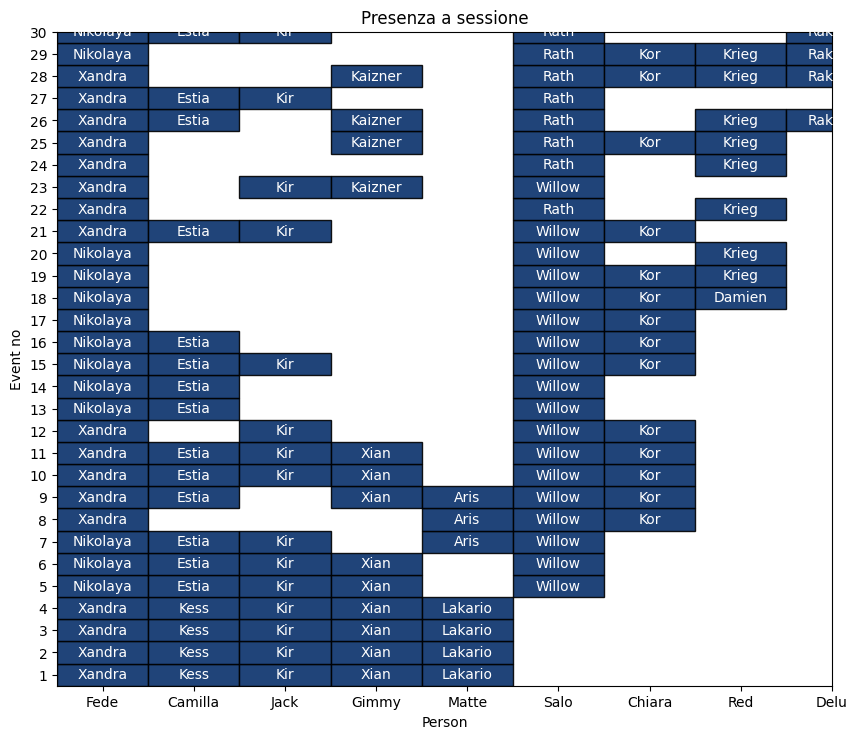

In [149]:
# Create color map
att_df = df.drop(["date", "title"], axis=1)
cmap = plt.colormaps["Blues"].resampled(2)

# Plot colored table
fig, ax = plt.subplots(figsize=(10,6))
for i, col in enumerate(att_df):
    for j, idx in enumerate(df.index):
        val = df.loc[idx, col]
        if not pd.isna(val):
            color = cmap(1)
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color=color, alpha=0.9, ec='k'))
            ax.text(i+0.5, j+0.5, val, ha='center', va='center', color='white')
ax.set_xticks(np.arange(len(att_df.columns))+0.5)
ax.set_xticklabels(att_df.columns)
ax.set_yticks(np.arange(len(df.index))+0.5)
ax.set_yticklabels(df.index)
ax.set_xlabel('Person')
ax.set_ylabel('Event no')
ax.set_title('Presenza a sessione')

plt.subplots_adjust(top=1.2)
plt.show();
